In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer as si

import statsmodels.api as sm
from statsmodels.api import OLS
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

import re

!pip install xgboost
from xgboost import XGBRegressor

# pd.set_option('display.max_rows',None)
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Projects/placement_project_june/Copy of Copy of City Power Consumption.xlsx')
data.head()

,S no,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone
0,1,6.559,73.8,0.083,0.051,0.119,158.0,1,34055.69620
1,2,6.414,74.5,0.083,0.070,0.085,159.0,1,29814.68354
2,3,6.313,74.5,0.080,0.062,0.100,151.0,1,29128.10127
3,4,6.121,75,0.083,0.091,0.096,151.0,1,28228.86076
4,5,5.921,75.7,0.081,0.048,0.085,154.0,1,27335.69620


In [6]:
data.shape

(52583, 9)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52583 entries, 0 to 52582
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   S no                          52583 non-null  int64  
 1   Temperature                   52263 non-null  object 
 2   Humidity                      52558 non-null  object 
 3   Wind Speed                    52512 non-null  float64
 4   general diffuse flows         52275 non-null  float64
 5   diffuse flows                 52568 non-null  float64
 6   Air Quality Index (PM)        52565 non-null  float64
 7   Cloudiness                    52583 non-null  int64  
 8    Power Consumption in A Zone  52583 non-null  float64
dtypes: float64(5), int64(2), object(2)
memory usage: 3.6+ MB


In [8]:
data['Temperature']

,Temperature
0,6.559
1,6.414
2,6.313
3,6.121
4,5.921
...,...
52578,NaN
52579,NaN
52580,NaN
52581,NaN


In [9]:
data.describe()

,S no,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone
count,52583.000000,52512.000000,52275.000000,52568.000000,52565.000000,52583.000000,52583.000000
mean,26292.000000,1.955320,182.964247,74.872330,154.499191,0.009338,31061.821779
std,15179.548939,2.347914,264.571351,124.084858,2.871553,0.096180,8021.057455
min,1.000000,0.050000,0.004000,0.011000,150.000000,0.000000,9457.750760
25%,13146.500000,0.078000,0.062000,0.122000,152.000000,0.000000,24738.858990
50%,26292.000000,0.086000,5.226000,4.412000,155.000000,0.000000,31189.787230
75%,39437.500000,4.915000,320.100000,100.500000,157.000000,0.000000,36721.582445
max,52583.000000,6.483000,1163.000000,936.000000,159.000000,1.000000,52204.395120


In [10]:
round((data.isnull().sum()/len(data))*100,2)

,0
S no,0.00
Temperature,0.61
Humidity,0.05
Wind Speed,0.14
general diffuse flows,0.59
diffuse flows,0.03
Air Quality Index (PM),0.03
Cloudiness,0.00
Power Consumption in A Zone,0.00


In [11]:
data.isnull().sum()

,0
S no,0
Temperature,320
Humidity,25
Wind Speed,71
general diffuse flows,308
diffuse flows,15
Air Quality Index (PM),18
Cloudiness,0
Power Consumption in A Zone,0


In [12]:
data.nunique()

,0
S no,52583
Temperature,3438
Humidity,4444
Wind Speed,548
general diffuse flows,10497
diffuse flows,10449
Air Quality Index (PM),10
Cloudiness,2
Power Consumption in A Zone,27760


In [16]:
def extract_float(val):

  val_str = str(val)
  match = re.search(r'\d+(.\d+)?',val_str)
  if match:
    return float(match.group())
  else:
    return np.nan


In [17]:
data['Temperature_clean'] = data['Temperature'].apply(extract_float)

In [18]:
data['Temperature'].isnull().sum()

np.int64(320)

In [19]:
data['Temperature_clean']

,Temperature_clean
0,6.559
1,6.414
2,6.313
3,6.121
4,5.921
...,...
52578,NaN
52579,NaN
52580,NaN
52581,NaN


In [20]:
data.head()

,S no,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone,Temperature_clean
0,1,6.559,73.8,0.083,0.051,0.119,158.0,1,34055.69620,6.559
1,2,6.414,74.5,0.083,0.070,0.085,159.0,1,29814.68354,6.414
2,3,6.313,74.5,0.080,0.062,0.100,151.0,1,29128.10127,6.313
3,4,6.121,75,0.083,0.091,0.096,151.0,1,28228.86076,6.121
4,5,5.921,75.7,0.081,0.048,0.085,154.0,1,27335.69620,5.921


In [21]:
data.describe()

,S no,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone,Temperature_clean
count,52583.000000,52512.000000,52275.000000,52568.000000,52565.000000,52583.000000,52583.000000,52263.000000
mean,26292.000000,1.955320,182.964247,74.872330,154.499191,0.009338,31061.821779,18.827384
std,15179.548939,2.347914,264.571351,124.084858,2.871553,0.096180,8021.057455,5.813293
min,1.000000,0.050000,0.004000,0.011000,150.000000,0.000000,9457.750760,3.247000
25%,13146.500000,0.078000,0.062000,0.122000,152.000000,0.000000,24738.858990,14.430000
50%,26292.000000,0.086000,5.226000,4.412000,155.000000,0.000000,31189.787230,18.820000
75%,39437.500000,4.915000,320.100000,100.500000,157.000000,0.000000,36721.582445,22.910000
max,52583.000000,6.483000,1163.000000,936.000000,159.000000,1.000000,52204.395120,40.010000


In [22]:
data.isnull().sum()

,0
S no,0
Temperature,320
Humidity,25
Wind Speed,71
general diffuse flows,308
diffuse flows,15
Air Quality Index (PM),18
Cloudiness,0
Power Consumption in A Zone,0
Temperature_clean,320


In [23]:
data.drop('S no', axis = 1)

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone,Temperature_clean
0,6.559,73.8,0.083,0.051,0.119,158.0,1,34055.69620,6.559
1,6.414,74.5,0.083,0.070,0.085,159.0,1,29814.68354,6.414
2,6.313,74.5,0.080,0.062,0.100,151.0,1,29128.10127,6.313
3,6.121,75,0.083,0.091,0.096,151.0,1,28228.86076,6.121
4,5.921,75.7,0.081,0.048,0.085,154.0,1,27335.69620,5.921
...,...,...,...,...,...,...,...,...,...
52578,NaN,75.6,0.094,436.200,38.960,157.0,0,34444.55696,NaN
52579,NaN,73.5,0.089,451.600,37.730,157.0,0,34438.48101,NaN
52580,NaN,70.1,0.085,466.400,37.490,157.0,0,33873.41772,NaN
52581,NaN,67.75,0.086,477.000,37.370,152.0,0,33988.86076,NaN


In [24]:
dic ={}
for i in data.columns:
  unique_types = set(type(x) for x in data[i] if pd.notnull(x))
  if len(unique_types) > 1:
    dic[i] = list(unique_types)

dic


{'Temperature': [int, str, float], 'Humidity': [int, str, float]}

In [25]:
data['Humidity_clean'] = data['Humidity'].apply(extract_float)

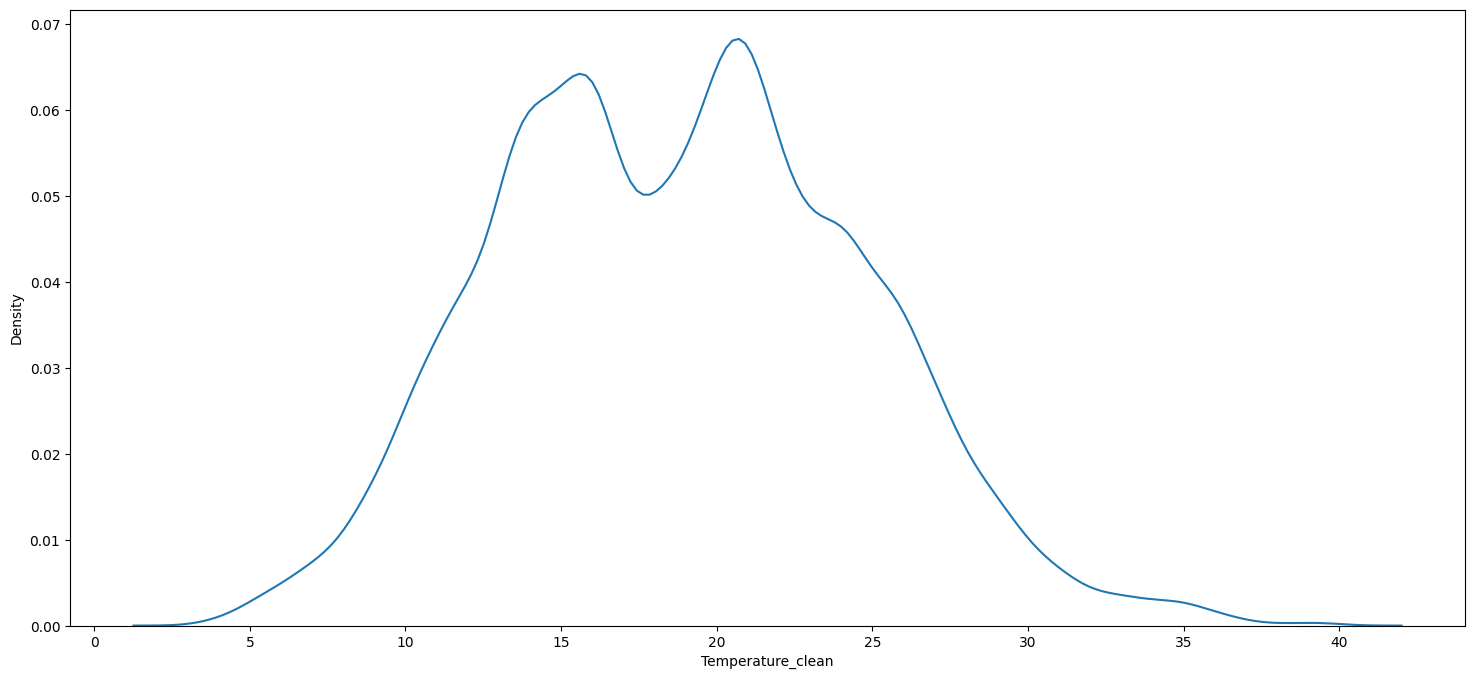

In [26]:
plt.figure(figsize =(18,8))
sns.kdeplot(data['Temperature_clean'])
plt.show()

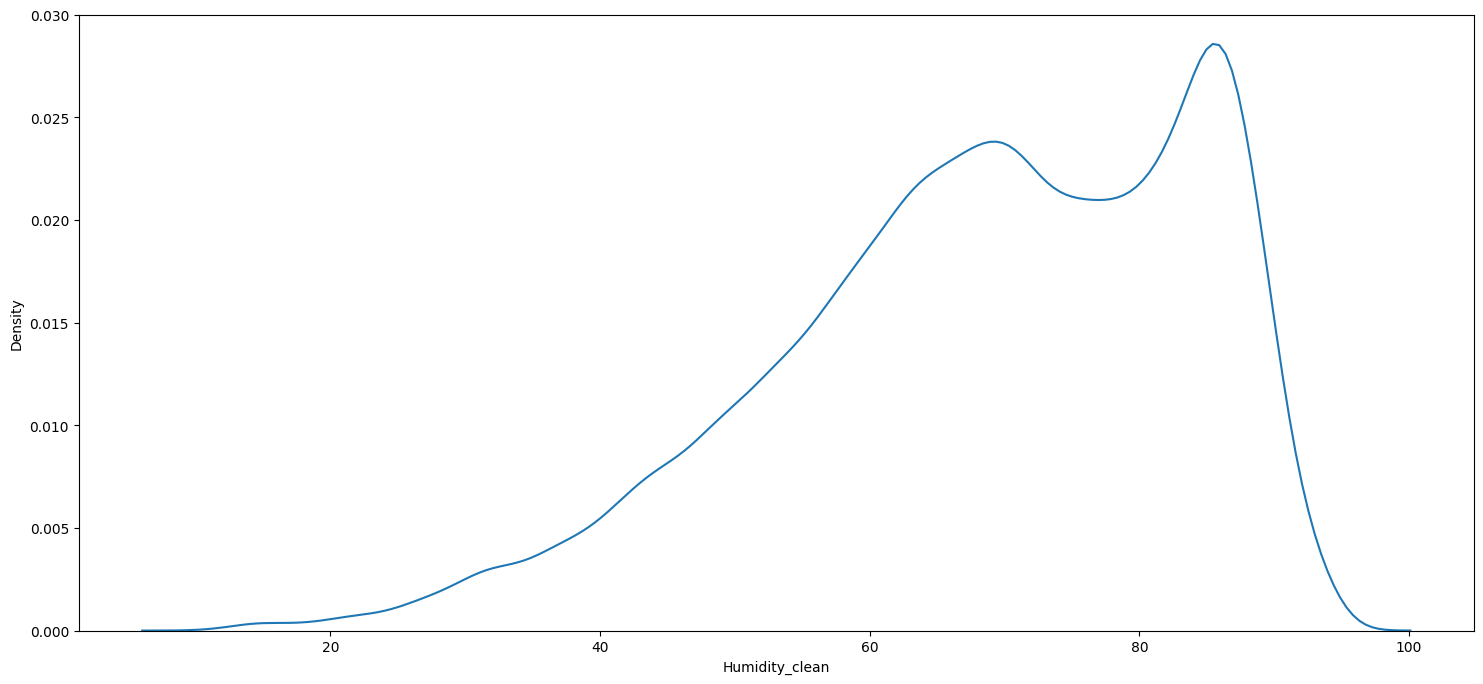

In [27]:
plt.figure(figsize =(18,8))
sns.kdeplot(data['Humidity_clean'])
plt.show()

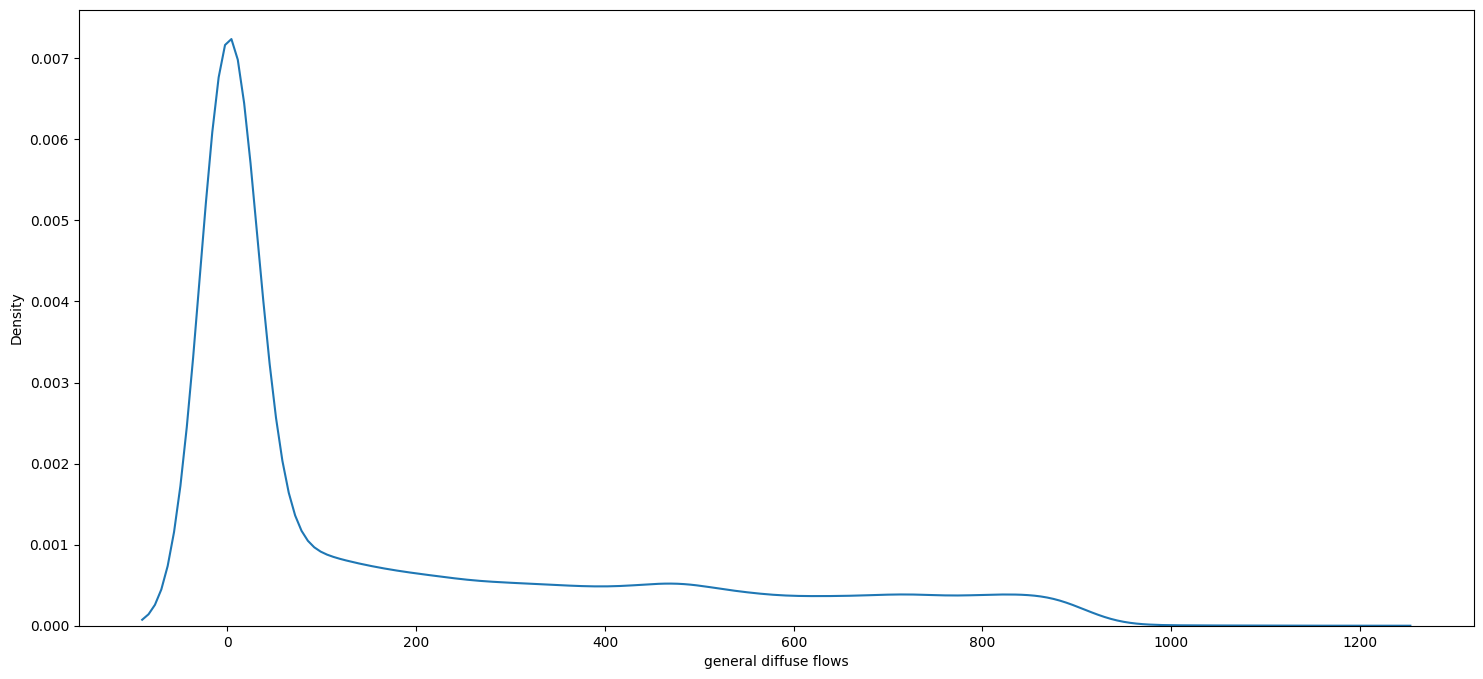

In [28]:
plt.figure(figsize =(18,8))
sns.kdeplot(data['general diffuse flows'])
plt.show()

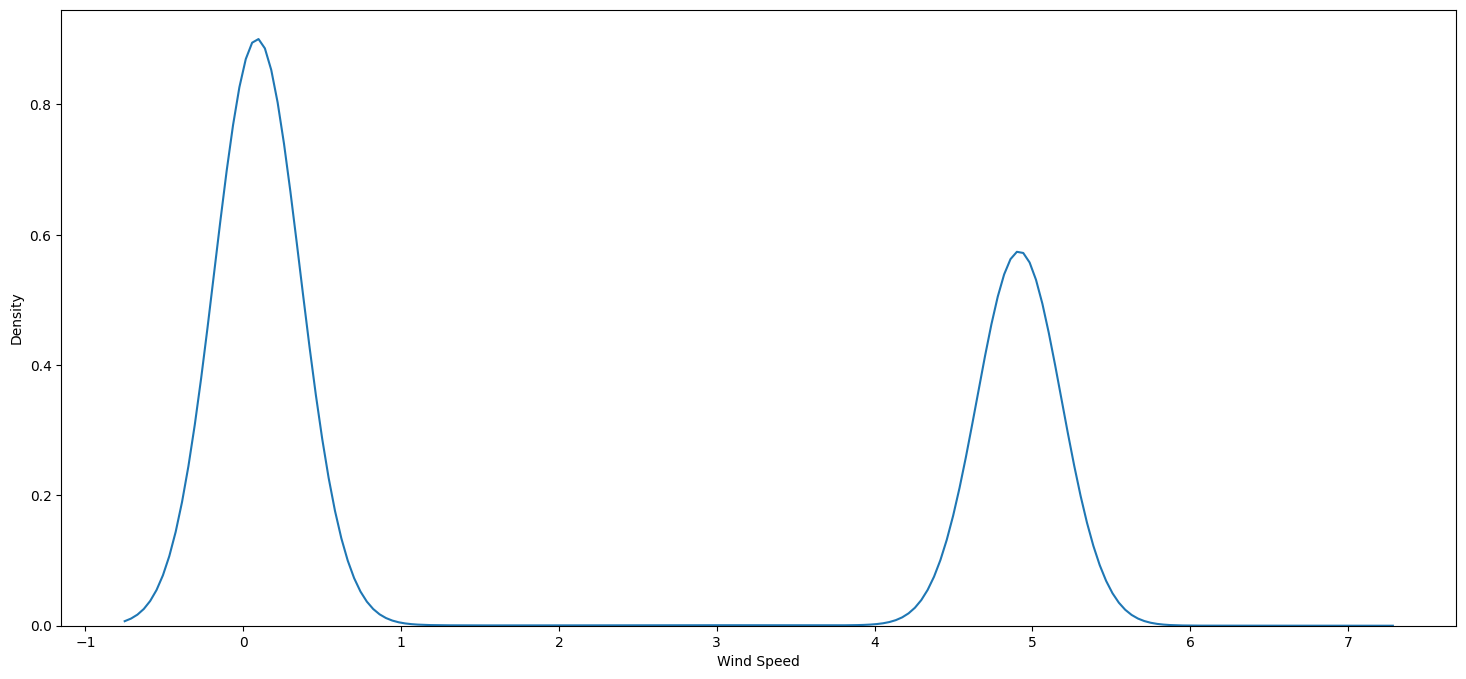

In [29]:
plt.figure(figsize = (18,8))
sns.kdeplot(data['Wind Speed'])
plt.show()

In [31]:
imputer = si(missing_values = np.nan, strategy = 'mean')
data['Temperature_clean'] = imputer.fit_transform(data[['Temperature_clean']])

In [32]:
imputer_gdf = si(missing_values = np.nan,strategy = 'median')
data['general diffuse flows'] = imputer.fit_transform(data[['general diffuse flows']])

In [33]:
imp = IterativeImputer(random_state=0)
data[['Wind Speed']] = imp.fit_transform(data[['Wind Speed']])


In [34]:
data['Wind Speed'].isnull().sum()/len(data)*100

np.float64(0.0)

In [35]:
data.isnull().sum()

,0
S no,0
Temperature,320
Humidity,25
Wind Speed,0
general diffuse flows,0
diffuse flows,15
Air Quality Index (PM),18
Cloudiness,0
Power Consumption in A Zone,0
Temperature_clean,0


In [36]:
clean_data = data.dropna()

In [37]:
clean_data.isnull().sum()

,0
S no,0
Temperature,0
Humidity,0
Wind Speed,0
general diffuse flows,0
diffuse flows,0
Air Quality Index (PM),0
Cloudiness,0
Power Consumption in A Zone,0
Temperature_clean,0


In [38]:
# Dropping all the non required features
drop = ['S no','Temperature','Humidity']
for col in drop:
  clean_data = clean_data.drop(col, axis = 1)

In [41]:
clean_data.isnull().sum()

,0
Wind Speed,0
general diffuse flows,0
diffuse flows,0
Air Quality Index (PM),0
Cloudiness,0
Power Consumption in A Zone,0
Temperature_clean,0
Humidity_clean,0


In [42]:
# Boxplot to see outliers
def box(data):
  for cols in data.columns:
    fig = plt.figure(figsize = (10,8))
    plt.boxplot(x=data[cols],orientation = 'horizontal')
    plt.xlabel(cols) # Add this line to set the x-label
    plt.show()

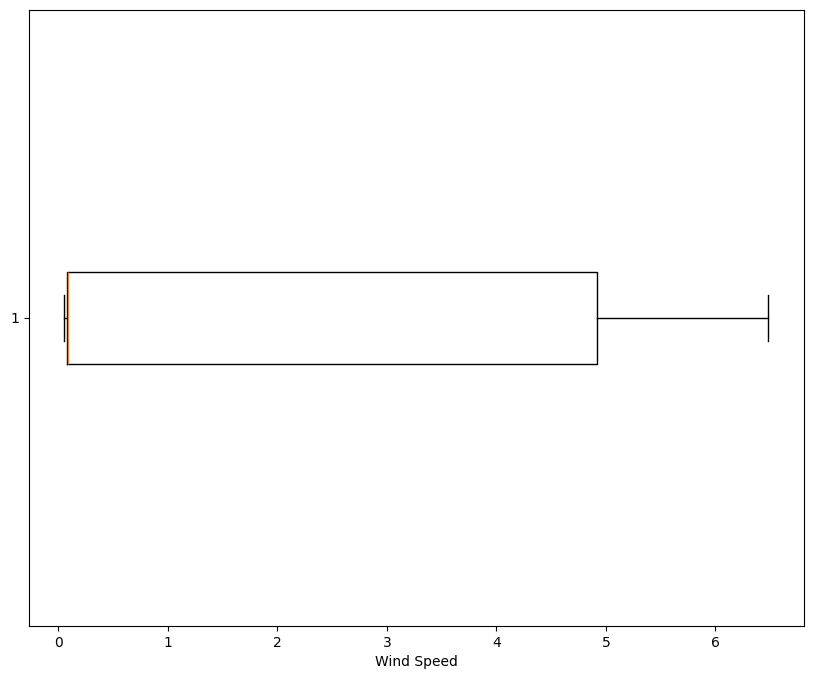

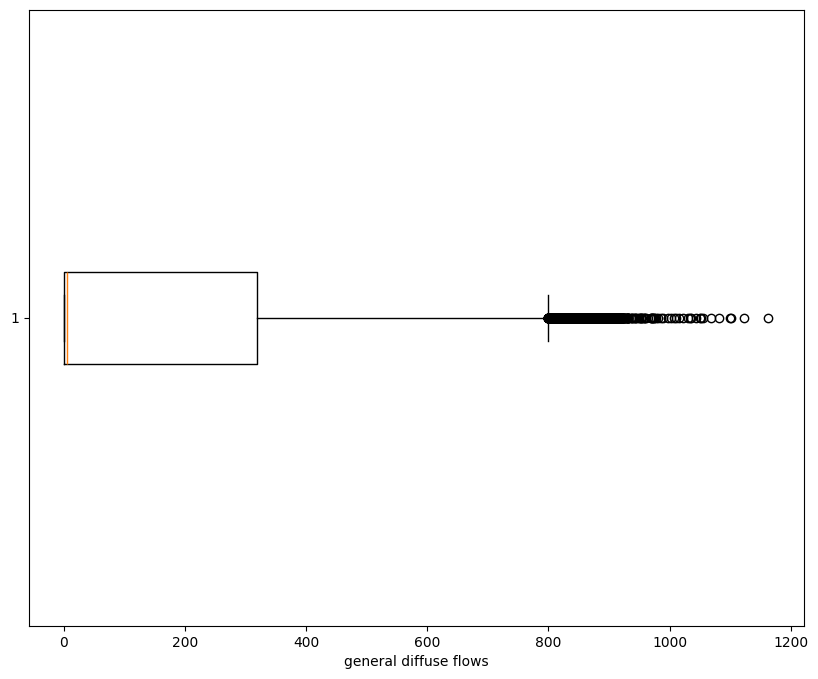

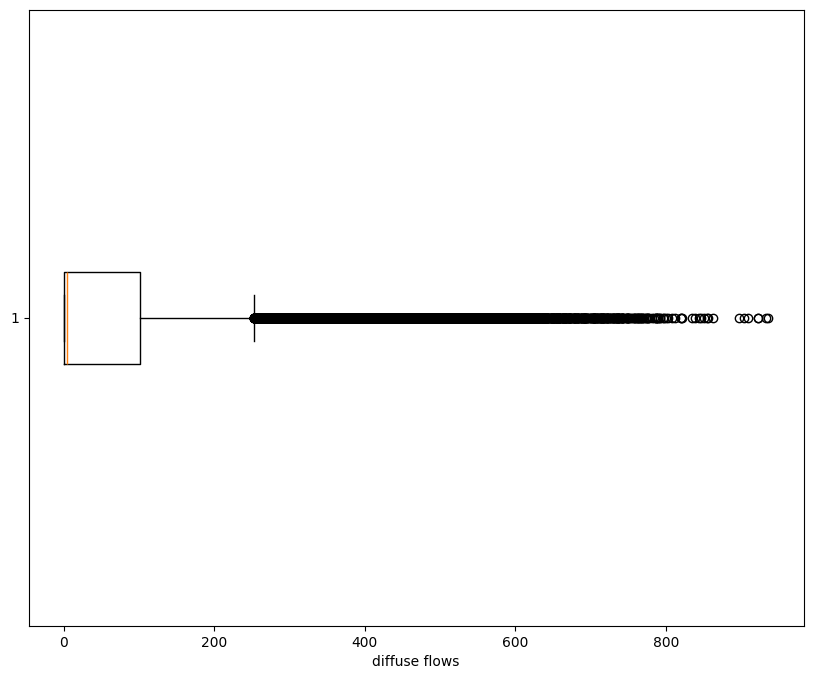

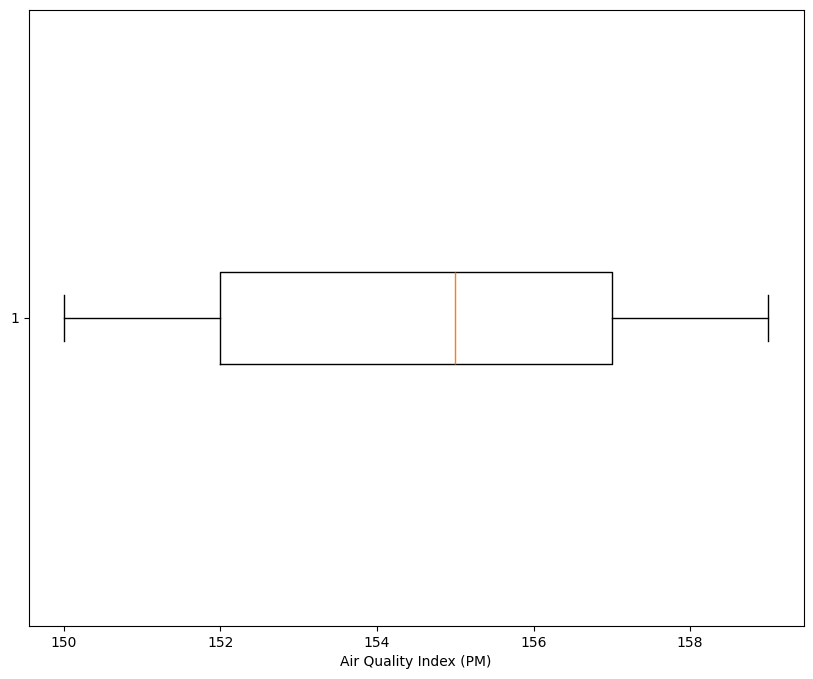

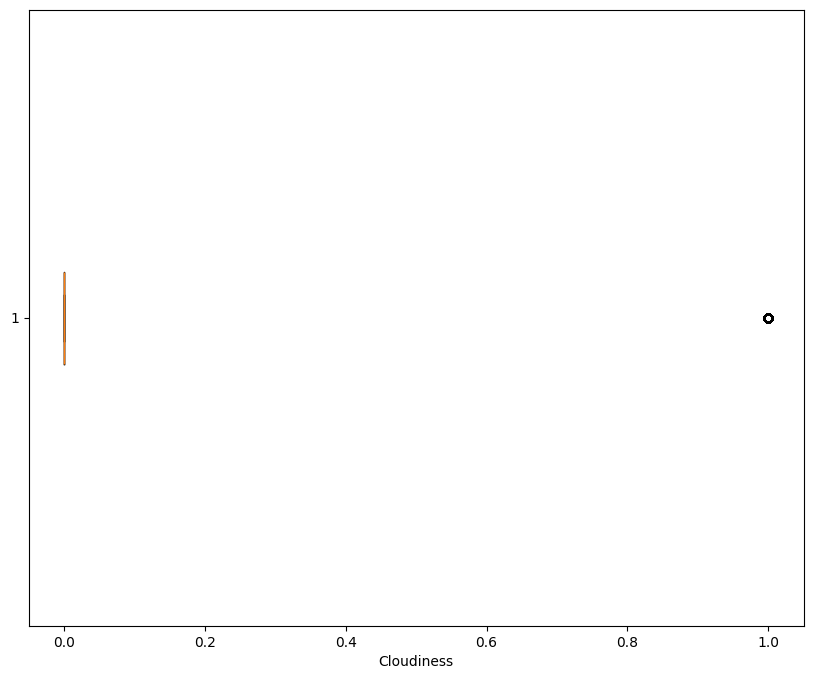

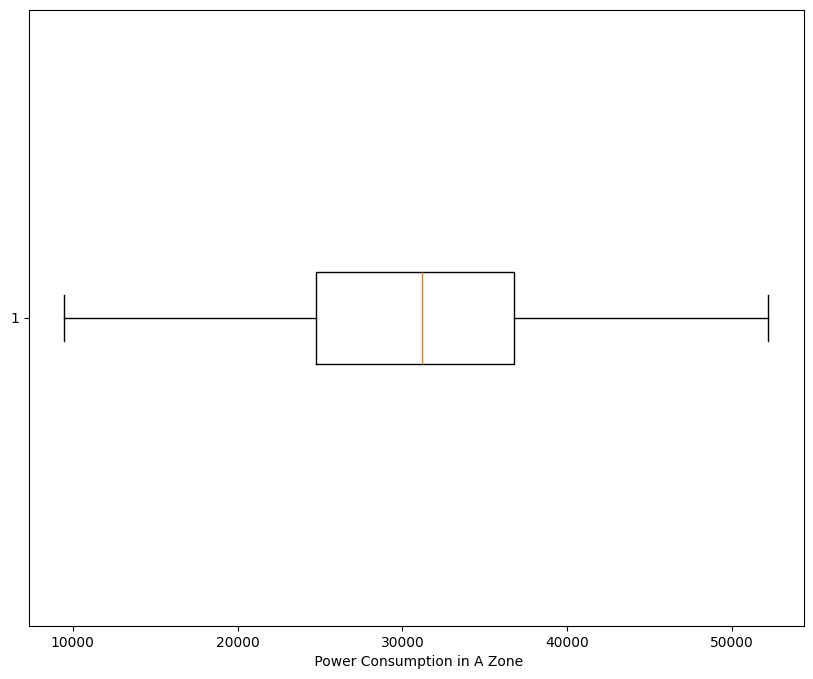

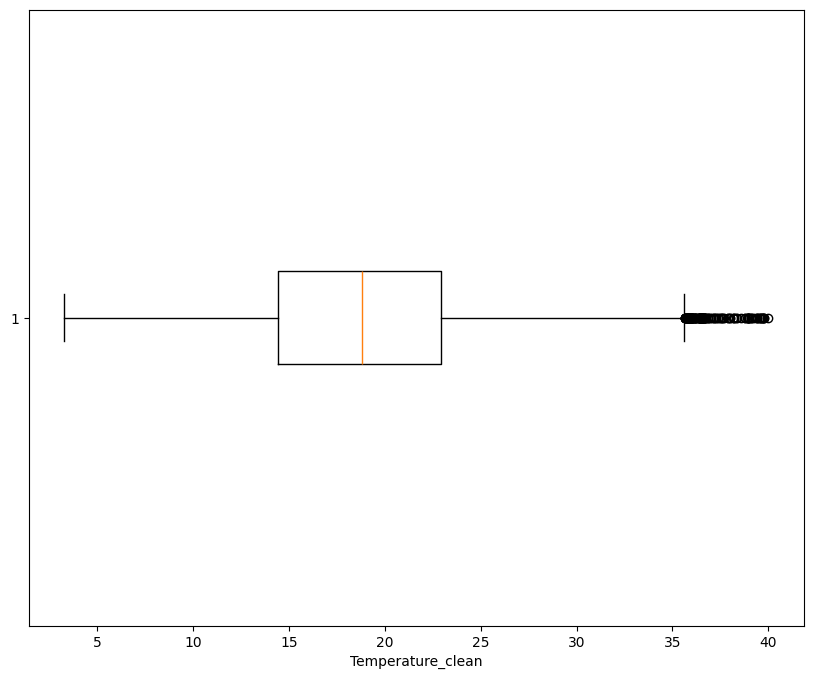

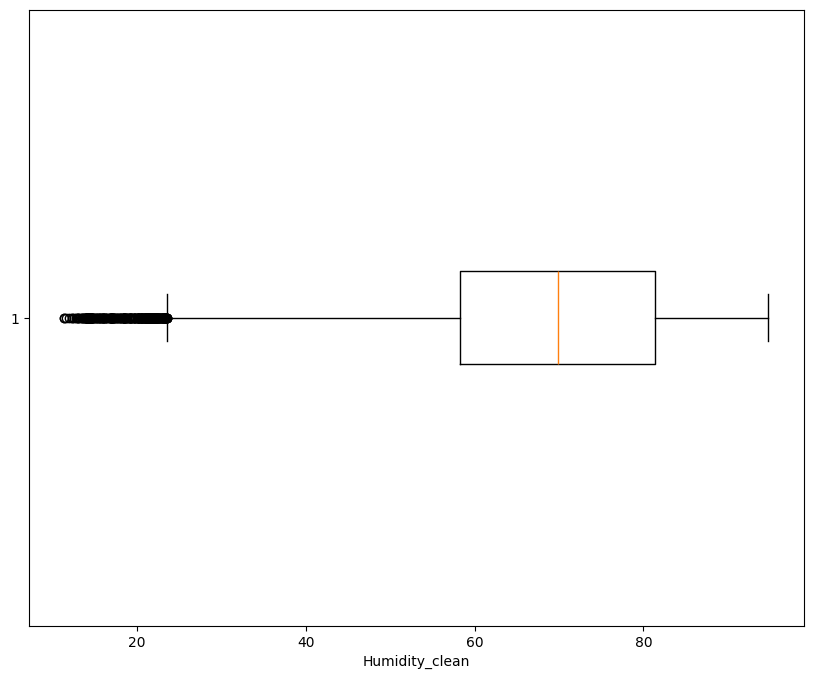

In [43]:
box(clean_data)

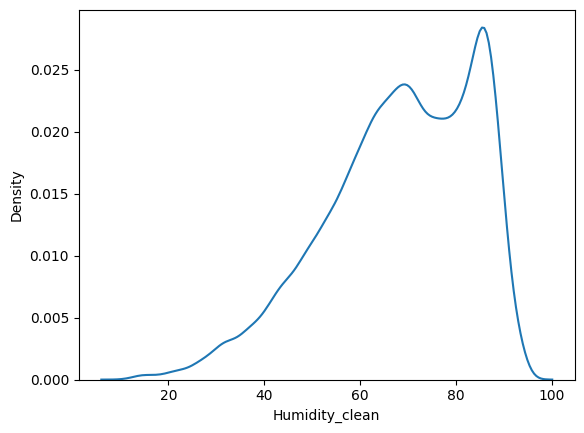

In [46]:
sns.kdeplot(clean_data['Humidity_clean'])
plt.show()

In [47]:
# numeric and object columns
multivariate_cols = [cols for cols in clean_data if clean_data[cols].nunique()>10]
bivariate_cols = [cols for cols in clean_data if clean_data[cols].nunique()<=10]

In [48]:
multivariate_cols

['Wind Speed',
 'general diffuse flows',
 'diffuse flows',
 ' Power Consumption in A Zone',
 'Temperature_clean',
 'Humidity_clean']

In [49]:
bivariate_cols

['Air Quality Index (PM)', 'Cloudiness']

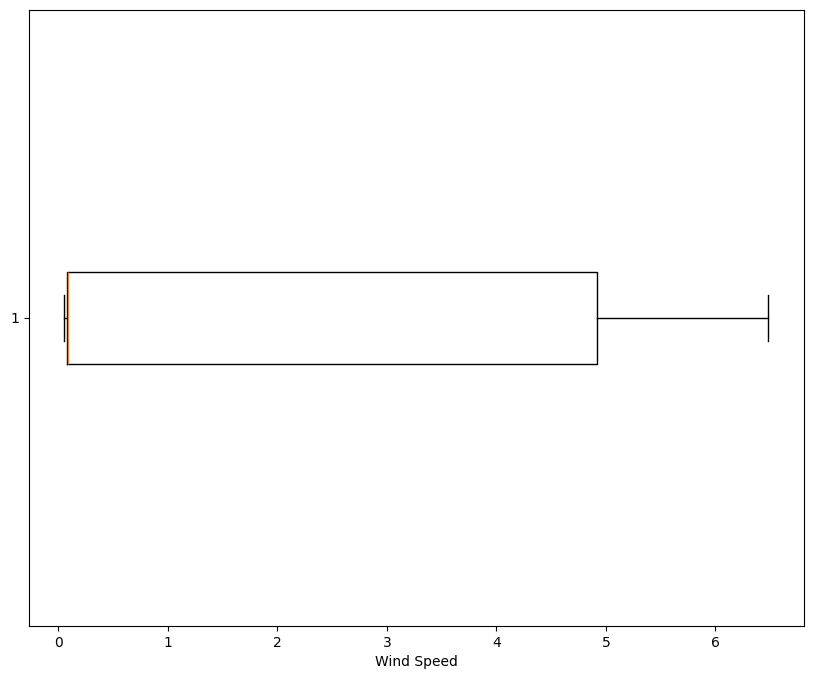

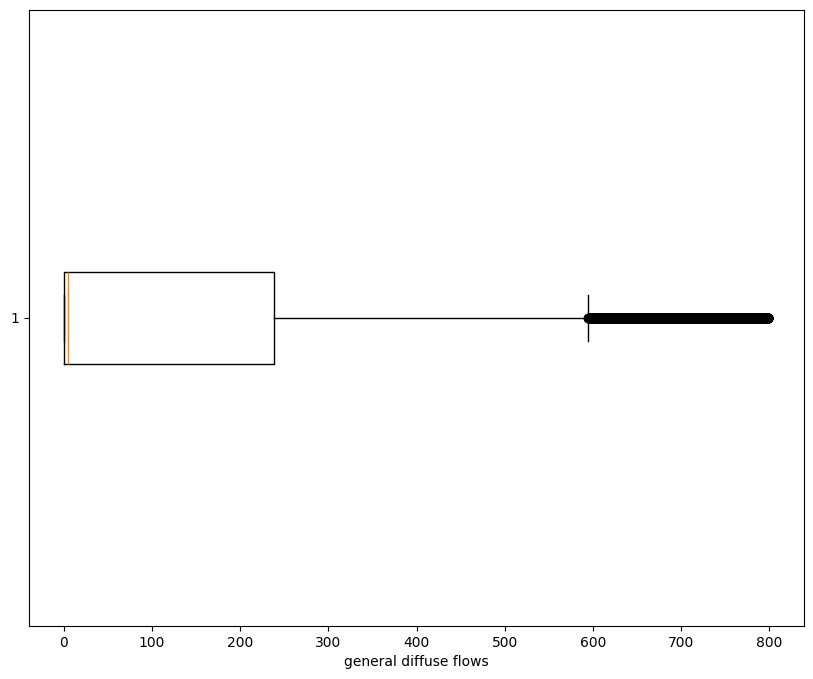

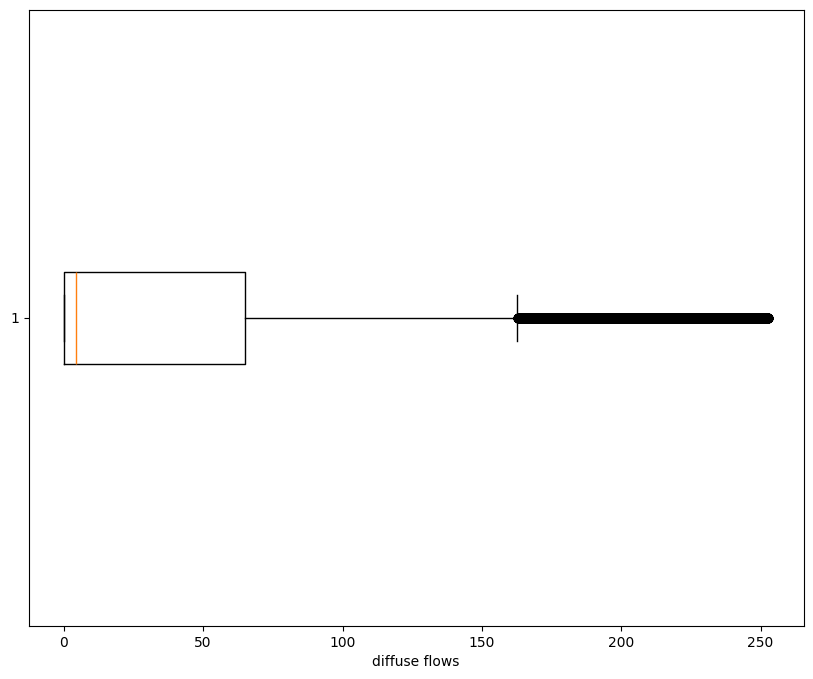

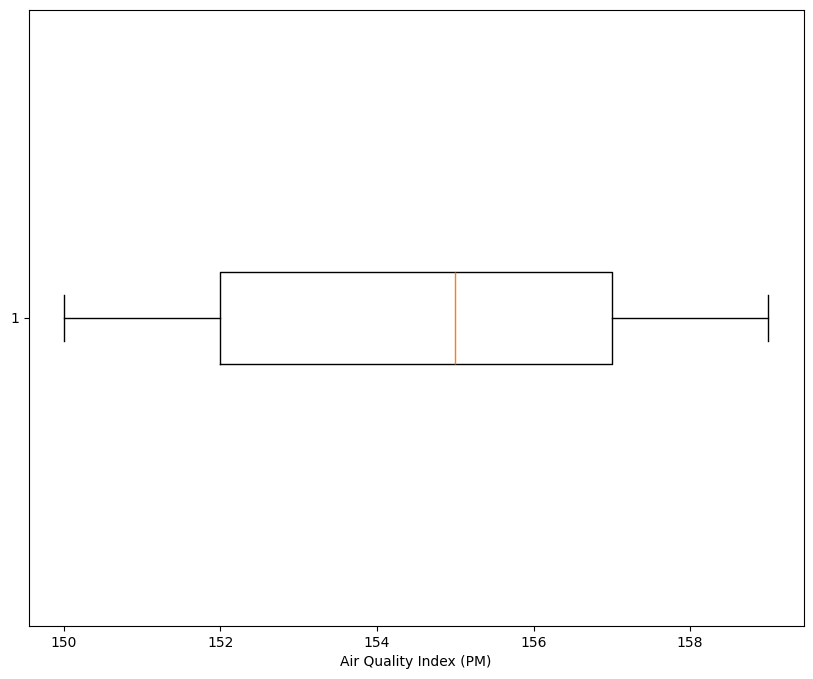

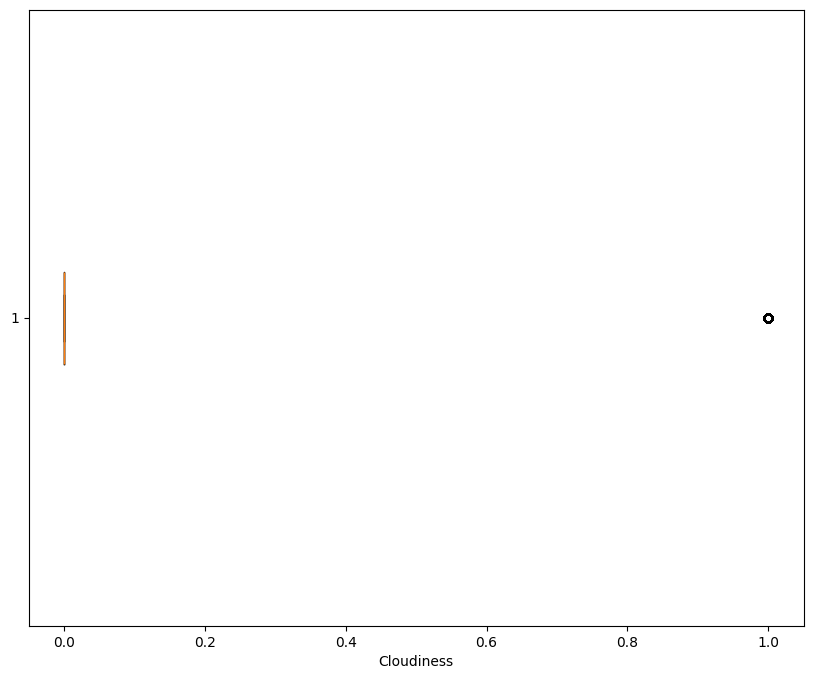

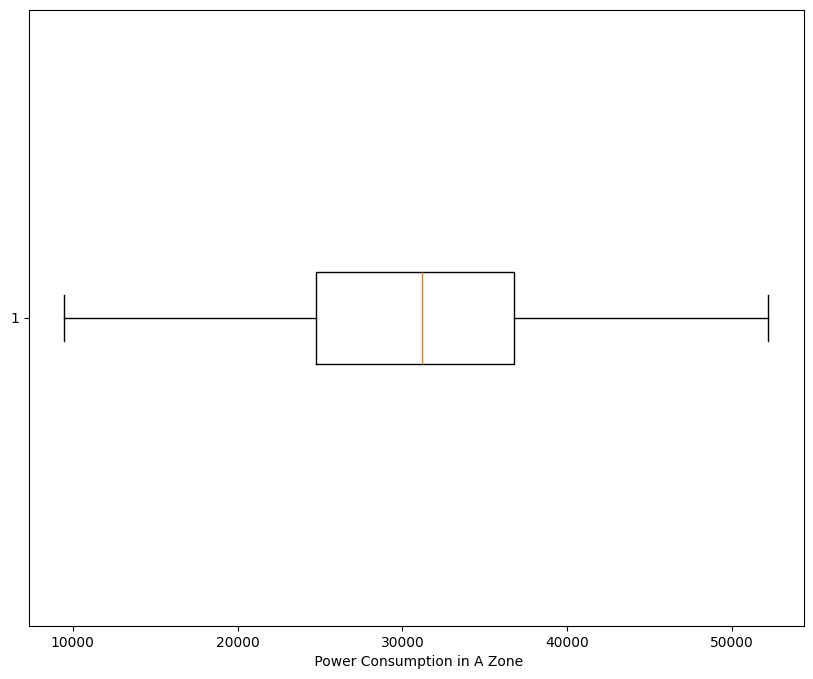

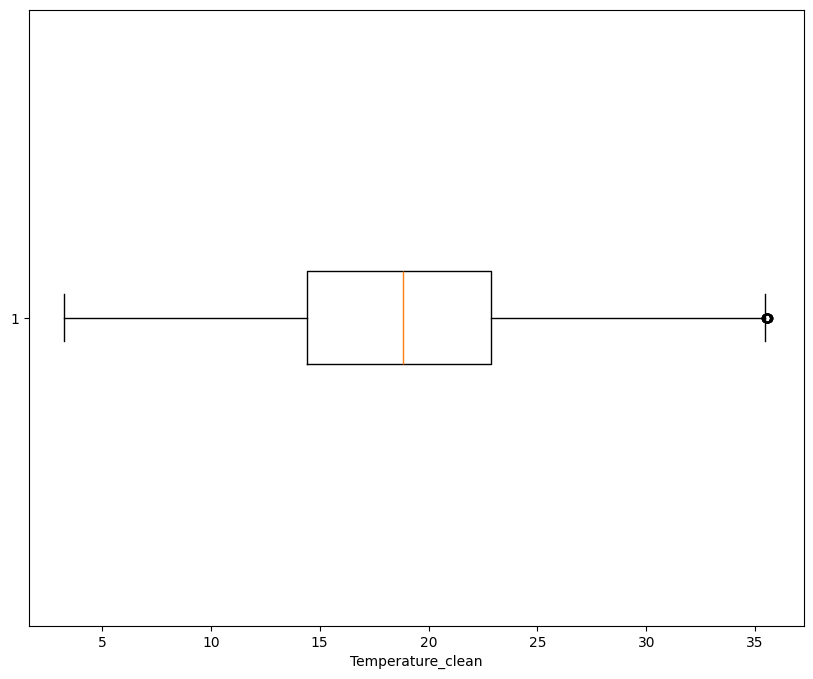

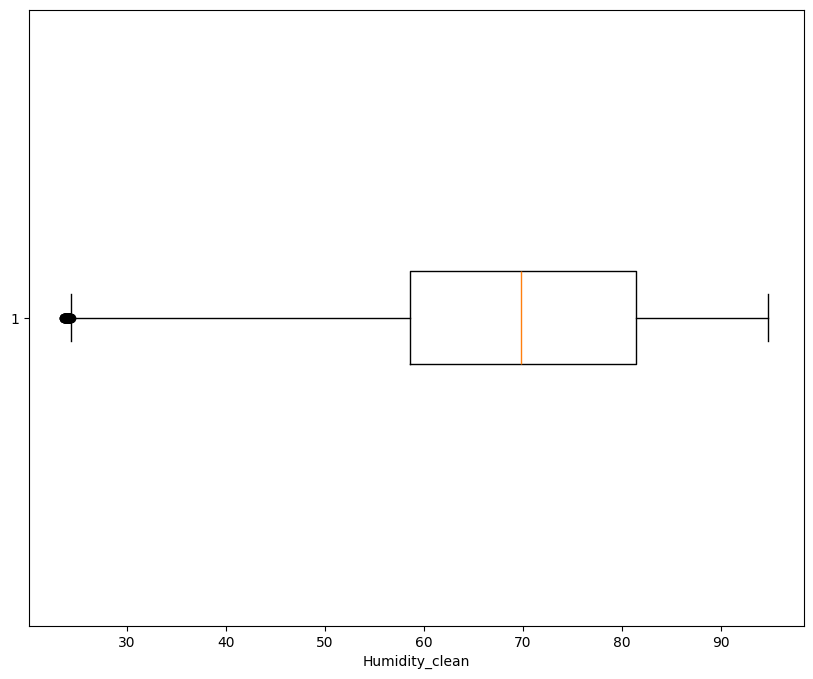

In [50]:
# Imputing outliers with the median
def impute_outliers_with_median(df, columns):
    for col in columns:
        if col != 'Cloudiness' and col != ' Power Consumption in A Zone' and col != 'Air Quality Index (PM)':
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            median_val = df[col].median()
            df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), median_val, df[col])
    return df

# Apply outlier imputation to the relevant columns
cols_to_impute = [col for col in clean_data.columns if col not in ['Cloudiness', ' Power Consumption in A Zone', 'Air Quality Index (PM)']]
clean_data_imputed = impute_outliers_with_median(clean_data.copy(), cols_to_impute)

# Check for outliers after imputation
box(clean_data_imputed)

In [51]:
# kde plot
def kde(data):
  for cols in data:
    figsize= (20,8)
    sns.kdeplot(x = clean_data[cols])
    plt.show()

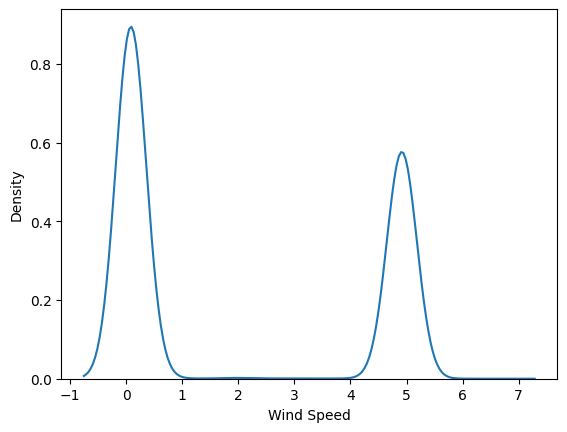

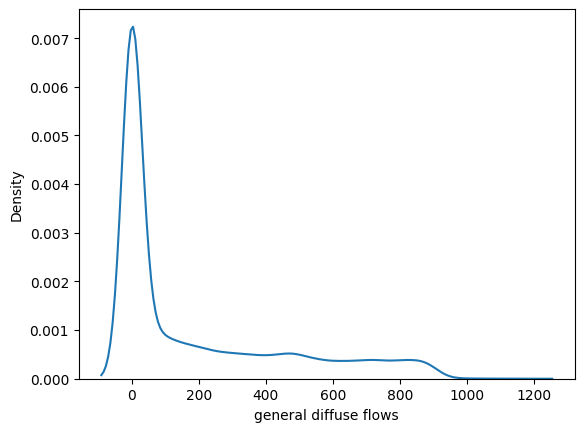

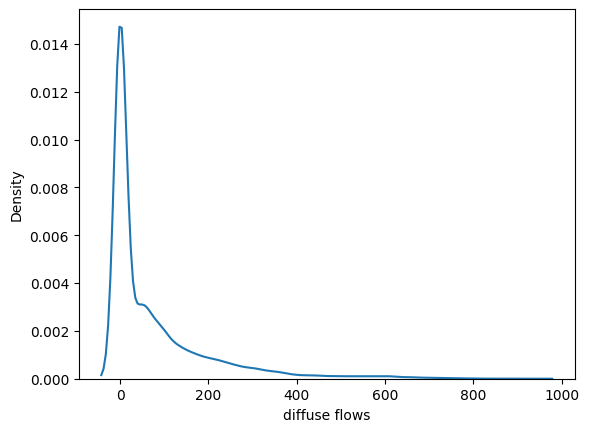

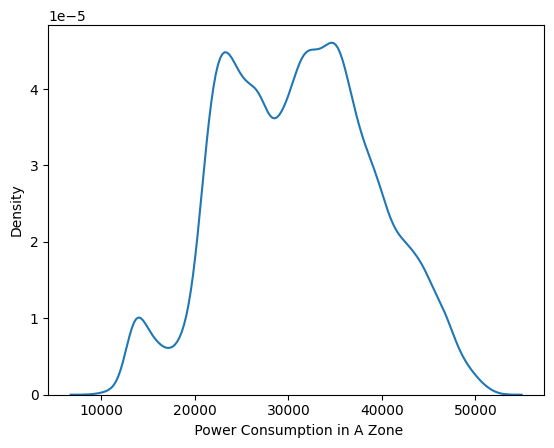

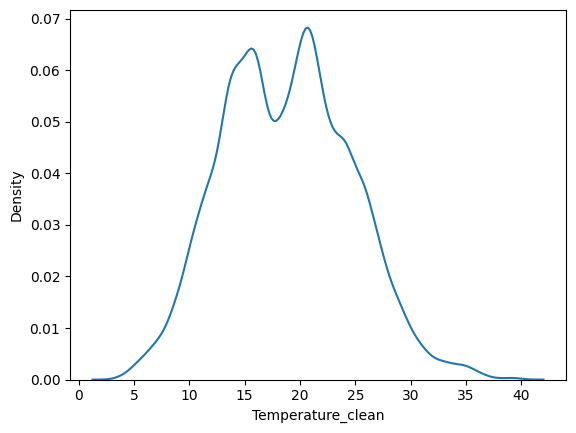

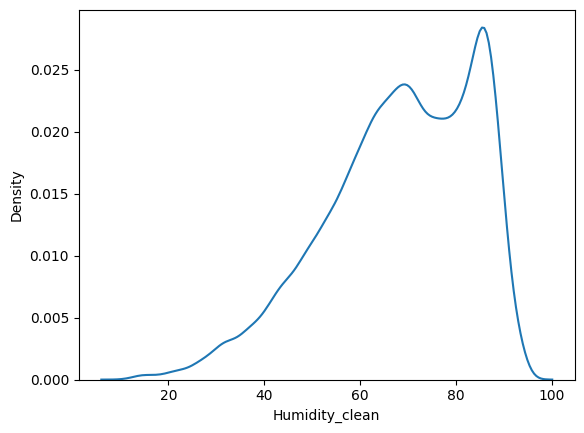

In [52]:
kde(multivariate_cols)

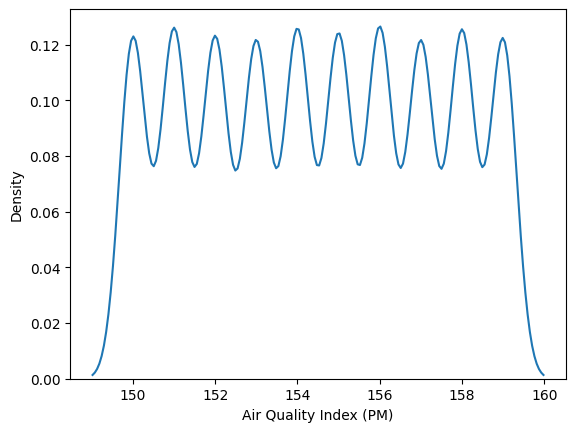

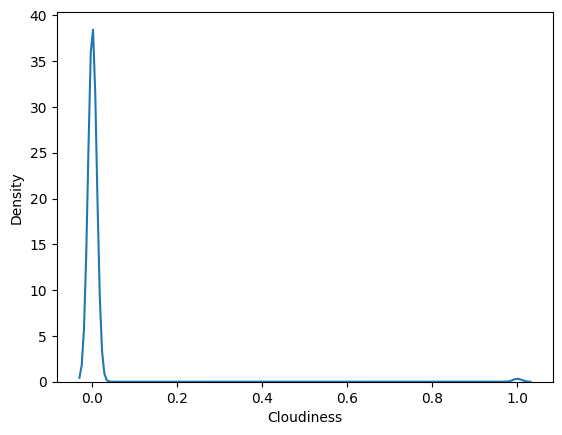

In [53]:
kde(bivariate_cols)

In [54]:
# train and test split
train_cols= [cols for cols in clean_data.columns if cols != ' Power Consumption in A Zone']
x = clean_data[train_cols]
y = clean_data[' Power Consumption in A Zone']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [55]:
print(x_train.shape)
print('*****************')
print(y_train.shape)
print('*****************')
print(x_test.shape)
print('*****************')
print(y_test.shape)

(41796, 7)
*****************
(41796,)
*****************
(10450, 7)
*****************
(10450,)


In [56]:
# standardizing the values
scaler = StandardScaler()
x_train[train_cols] = scaler.fit_transform(x_train[train_cols])
x_test[train_cols]= scaler.transform(x_test[train_cols])
x_train

,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Temperature_clean,Humidity_clean
40479,-0.802274,-0.692118,-0.604571,0.175434,-0.090964,-0.424862,0.793071
31426,1.246270,-0.692170,-0.604717,0.175434,-0.090964,1.340896,0.304696
34810,1.254352,0.296723,0.420360,0.524050,-0.090964,1.788360,-1.037052
47988,-0.806103,-0.692227,-0.605016,-0.173182,-0.090964,-1.502215,0.870183
31490,1.247121,0.616373,1.339726,-0.521798,-0.090964,2.075769,-1.163645
...,...,...,...,...,...,...,...
11436,-0.806103,-0.080291,0.634448,-1.567645,-0.090964,-0.979028,0.992277
44890,-0.810356,-0.485760,-0.091189,-0.173182,-0.090964,0.266985,0.413938
38310,1.251374,-0.692159,-0.604749,-1.219029,-0.090964,0.401224,1.095093
971,-0.808229,-0.561012,-0.267225,-1.567645,-0.090964,-0.753575,0.035446


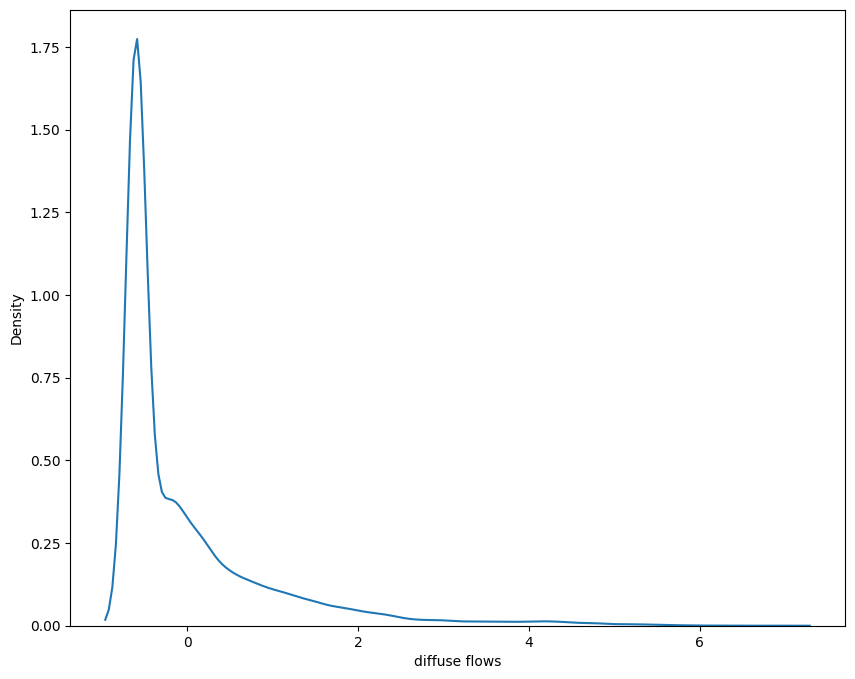

In [57]:
plt.figure(figsize = (10,8))
sns.kdeplot(x_train['diffuse flows'])
plt.show()

In [58]:
# Model Training
# linear regression model/OLS
const =sm.add_constant(x_train['Temperature_clean'])
lr_model = sm.OLS(y_train, const).fit()

In [59]:
const

,const,Temperature_clean
40479,1.0,-0.424862
31426,1.0,1.340896
34810,1.0,1.788360
47988,1.0,-1.502215
31490,1.0,2.075769
...,...,...
11436,1.0,-0.979028
44890,1.0,0.266985
38310,1.0,0.401224
971,1.0,-0.753575


In [60]:
print(lr_model.params)

const                31067.588114
Temperature_clean     4485.270858
dtype: float64


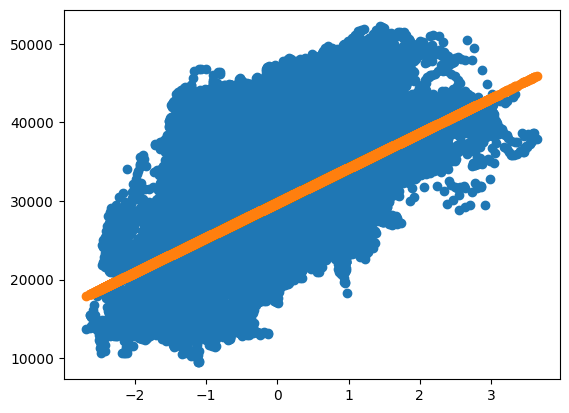

In [61]:
# scatter plot
plt.scatter(x_train['Temperature_clean'],y_train)
plt.scatter(x_train['Temperature_clean'], 4432.838752*(x_train['Temperature_clean'])+29770.848802)
plt.show()

In [62]:
print(lr_model.summary())

                                 OLS Regression Results                                 
Dep. Variable:      Power Consumption in A Zone   R-squared:                       0.314
Model:                                      OLS   Adj. R-squared:                  0.314
Method:                           Least Squares   F-statistic:                 1.911e+04
Date:                          Sat, 12 Jul 2025   Prob (F-statistic):               0.00
Time:                                  13:10:00   Log-Likelihood:            -4.2710e+05
No. Observations:                         41796   AIC:                         8.542e+05
Df Residuals:                             41794   BIC:                         8.542e+05
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------

In [63]:
mlr_data = sm.add_constant(x_train)
mlr_model = sm.OLS(y_train,mlr_data).fit()
print(mlr_model.summary())

                                 OLS Regression Results                                 
Dep. Variable:      Power Consumption in A Zone   R-squared:                       0.327
Model:                                      OLS   Adj. R-squared:                  0.327
Method:                           Least Squares   F-statistic:                     2905.
Date:                          Sat, 12 Jul 2025   Prob (F-statistic):               0.00
Time:                                  13:10:00   Log-Likelihood:            -4.2668e+05
No. Observations:                         41796   AIC:                         8.534e+05
Df Residuals:                             41788   BIC:                         8.535e+05
Df Model:                                     7                                         
Covariance Type:                      nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------

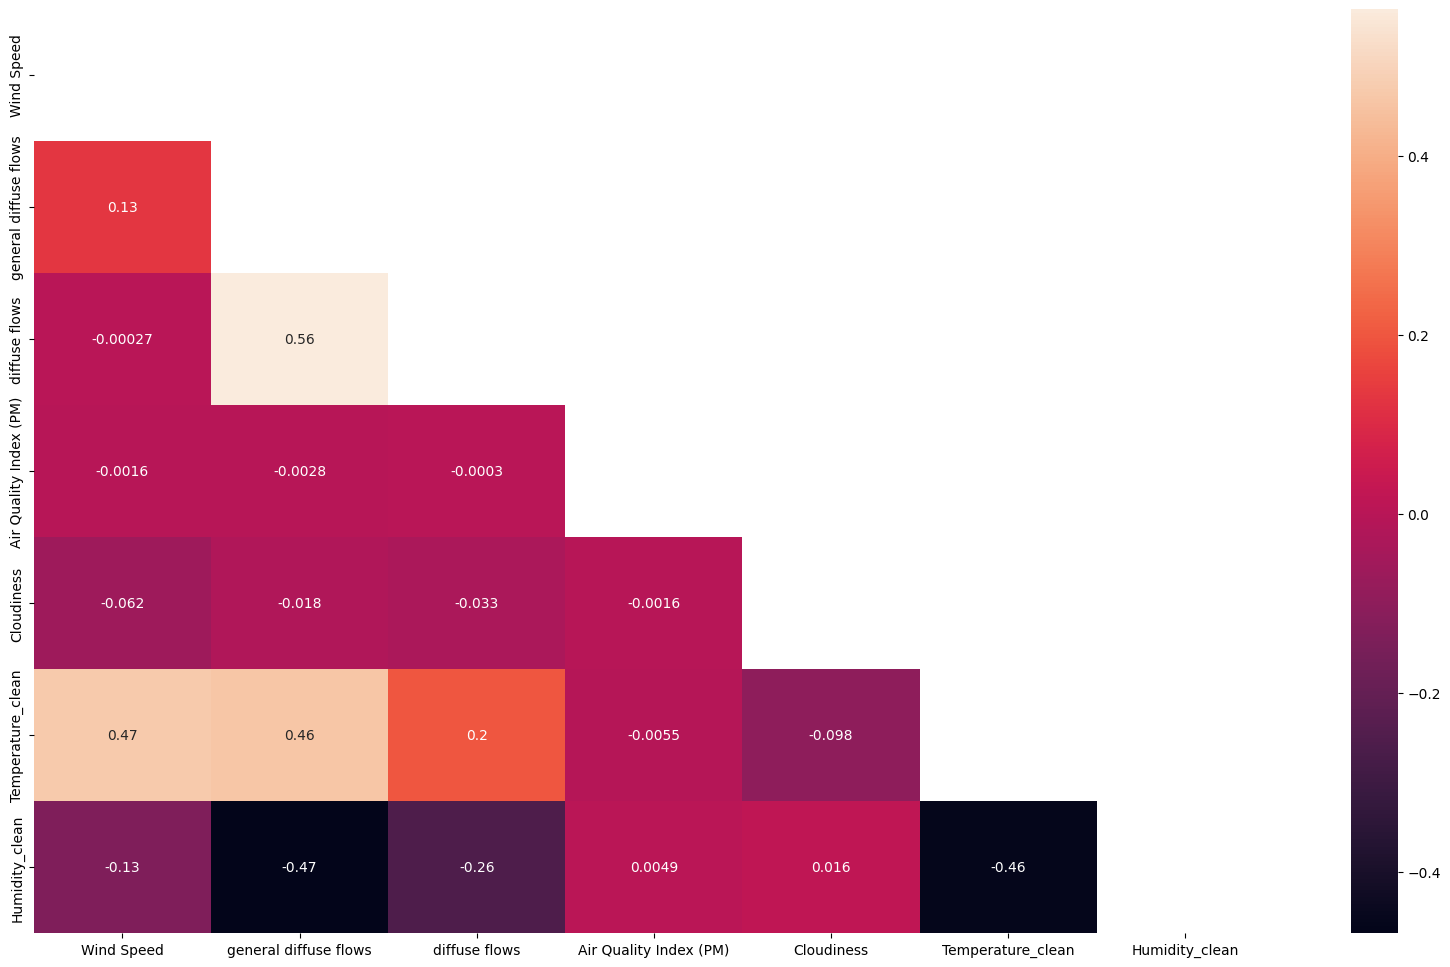

In [64]:
plt.figure(figsize = (20,12))
sns.heatmap(x_train.corr(),annot = True, mask = np.triu(x_train.corr()))
plt.show()

In [65]:
vif_df = pd.DataFrame()
vif_df['Feature'] = x_train.columns
vif_df['VIF'] = [round(vif(x_train.values,i),2) for i in range(x_train.shape[1])]
vif_df = vif_df.sort_values(by = 'VIF', ascending = False)
vif_df

,Feature,VIF
1,general diffuse flows,1.95
5,Temperature_clean,1.81
2,diffuse flows,1.49
6,Humidity_clean,1.43
0,Wind Speed,1.32
4,Cloudiness,1.01
3,Air Quality Index (PM),1.00


In [66]:
# x_train_new = x_train.drop(['Temperature_clean'],axis = 1)

In [67]:
# vif_df = pd.DataFrame()
# vif_df['Feature'] = x_train_new.columns
# vif_df['VIF'] = [round(vif(x_train_new.values,i),2) for i in range(x_train_new.shape[1])]
# vif_df = vif_df.sort_values(by = 'VIF', ascending = False)
# vif_df

In [68]:
const_2 = sm.add_constant(x_train)
mlr_2 = sm.OLS(y_train, const_2).fit()
print(mlr_2.summary())

                                 OLS Regression Results                                 
Dep. Variable:      Power Consumption in A Zone   R-squared:                       0.327
Model:                                      OLS   Adj. R-squared:                  0.327
Method:                           Least Squares   F-statistic:                     2905.
Date:                          Sat, 12 Jul 2025   Prob (F-statistic):               0.00
Time:                                  13:10:01   Log-Likelihood:            -4.2668e+05
No. Observations:                         41796   AIC:                         8.534e+05
Df Residuals:                             41788   BIC:                         8.535e+05
Df Model:                                     7                                         
Covariance Type:                      nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------

In [69]:
x_test_new = sm.add_constant(x_test)
# x_test_new.drop(['Temperature_clean'],axis = 1, inplace = True)

y_pred_new = mlr_2.predict(x_test_new)

In [70]:
print('Testing accuracy: ', round(r2_score(y_test,y_pred_new)*100,2),'%')

Testing accuracy:  32.84 %


In [71]:
# SGD model (STochastic Descent Model)
sgd = SGDRegressor()
sgd.fit(x_train,y_train)
print('Training Accuracy: ',sgd.score(x_train,y_train)*100)


y_pred_sgd = sgd.predict(x_test)
print('Testing Accuracy: ',round(r2_score(y_test,y_pred_sgd)*100,2))
sgd_score = r2_score(y_test,y_pred_sgd)*100

Training Accuracy:  32.70485311545935
Testing Accuracy:  32.79


In [72]:
# x_test_2 = x_test.drop(['Temperature_clean'],axis = 1)

In [73]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor()
model_rf.fit(x_train, y_train)
print('Training Accuracy: ',round(model_rf.score(x_train,y_train)*100,2))

y_pred_rf = model_rf.predict(x_test)
print('Testing accuracy: ',round(r2_score(y_test,y_pred_rf)*100,2))
model_rf_score = r2_score(y_test,y_pred_rf)*100

Training Accuracy:  94.8
Testing accuracy:  63.16


In [74]:
model_svr = SVR()
model_svr.fit(x_train,y_train)
print('Training Accuracy: ',round(model_svr.score(x_train,y_train)*100,2))

y_pred_svr = model_svr.predict(x_test)
print('Testing accuracy: ',round(r2_score(y_test,y_pred_rf)*100,2))
model_svr_score = r2_score(y_test,y_pred_svr)*100

Training Accuracy:  12.54
Testing accuracy:  63.16


In [75]:
adboost = AdaBoostRegressor()
adboost.fit(x_train,y_train)
print('Training Accuracy:',round(adboost.score(x_train,y_train)*100,2))
y_pred_adboost = adboost.predict(x_test)
adboost_score = r2_score(y_test,y_pred_adboost)*100

Training Accuracy: 34.1


In [91]:
xgb_r = XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)
xgb_r.fit(x_train,y_train)
print('Training score: ',round(xgb_r.score(x_train,y_train)*100,2),'%')

y_pred = xgb_r.predict(x_test)
print('Testing score: ',round(r2_score(y_test,y_pred)*100,2),'%')

xgb_score = round(r2_score(y_test,y_pred)*100,2)


Training score:  48.86 %
Testing score:  47.53 %


In [93]:
# Voting Regressor
model_vr = VotingRegressor(estimators = [('adaboost',adboost),('rforest',model_rf),
                                          ('svr',model_svr),('sgdescent',sgd),('xgbr',xgb_r)])
model_vr.fit(x_train,y_train)
y_pred_vr = model_vr.predict(x_test)
accuracy_vr = r2_score(y_test,y_pred_vr)*100

list1 = ['adaboost','rforest','svr','sgdescent','xgbr','voting_regressor']
list2 = [adboost_score,model_rf_score, model_svr_score,sgd_score,xgb_score,accuracy_vr]

df_accuracy = pd.DataFrame({'Model':list1,'Accuracy':list2})
print(df_accuracy)

              Model   Accuracy
0          adaboost  34.152470
1           rforest  63.160537
2               svr  12.376121
3         sgdescent  32.791736
4              xgbr  47.530000
5  voting_regressor  45.848872


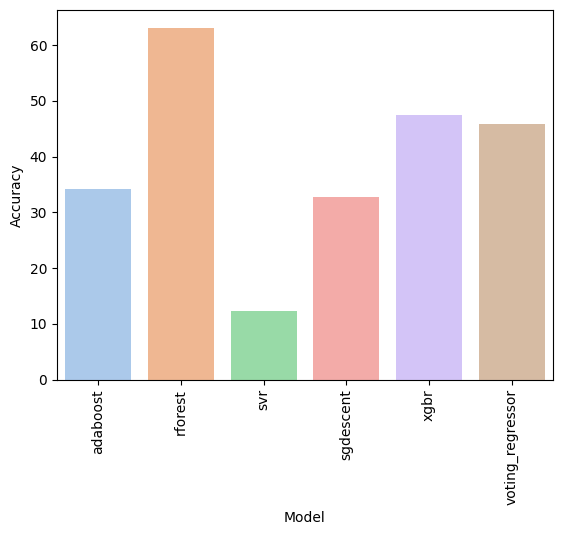

In [97]:
# Comparing the test accuracy of all the models with original columns and default parameters
chart = sns.barplot(x = 'Model',y = 'Accuracy', data = df_accuracy, palette= 'pastel')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
plt.show()

In [78]:
# # exploring Randomforest as a potential model and to extract important features
# from sklearn.model_selection import GridSearchCV
# hyper_fit = GridSearchCV(model_rf, cv=5,
#                          param_grid = {'criterion': ['squared_error', 'absolute_error'],
#                                        'bootstrap': [True, False],
#                                        'oob_score':[True,False]},
#                          n_jobs=-1)

# hyper_fit.fit(x_train,y_train)


In [79]:
# print('best parameters from grid search: ',hyper_fit.best_params_)

In [80]:
final_rf_model = RandomForestRegressor(criterion = 'squared_error' ,bootstrap = True, oob_score = True,random_state=42)

In [81]:
# Training and testing the RandomForestClassifier model with original features
final_rf_model.fit(x_train,y_train)
print('\nTraining score: ',round(final_rf_model.score(x_train,y_train)*100,2),'%')

y_pred = final_rf_model.predict(x_test)
print('\nTesting accuracy: ',round(r2_score(y_test,y_pred)*100,2),'%')


Training score:  94.78 %

Testing accuracy:  63.27 %


In [82]:
# feature importance
importance = final_rf_model.feature_importances_
importance = np.sort(importance)[::-1]
importance

array([0.46406804, 0.17204164, 0.11404134, 0.11235471, 0.09607197,
       0.03694014, 0.00448216])

In [83]:
idx  = np.argsort(importance)[::-1]
idx

array([0, 1, 2, 3, 4, 5, 6])

In [84]:
name_idx = list(x_train.columns)
name_idx

['Wind Speed',
 'general diffuse flows',
 'diffuse flows',
 'Air Quality Index (PM)',
 'Cloudiness',
 'Temperature_clean',
 'Humidity_clean']

In [85]:
# dataframe for importance
impurity_df = pd.DataFrame({'mean_impurity':importance,'column_index':idx})
impurity_df.index = range(1,len(impurity_df)+1)
impurity_df['column_name'] = impurity_df['column_index'].apply(lambda x:name_idx[x])
impurity_df = impurity_df[['column_name','mean_impurity']]
impurity_df['percentage_impurity'] = round(impurity_df['mean_impurity']*100,3)
impurity_df['cum_impurity'] = impurity_df['percentage_impurity'].cumsum()
impurity_df

,column_name,mean_impurity,percentage_impurity,cum_impurity
1,Wind Speed,0.464068,46.407,46.407
2,general diffuse flows,0.172042,17.204,63.611
3,diffuse flows,0.114041,11.404,75.015
4,Air Quality Index (PM),0.112355,11.235,86.250
5,Cloudiness,0.096072,9.607,95.857
6,Temperature_clean,0.036940,3.694,99.551
7,Humidity_clean,0.004482,0.448,99.999


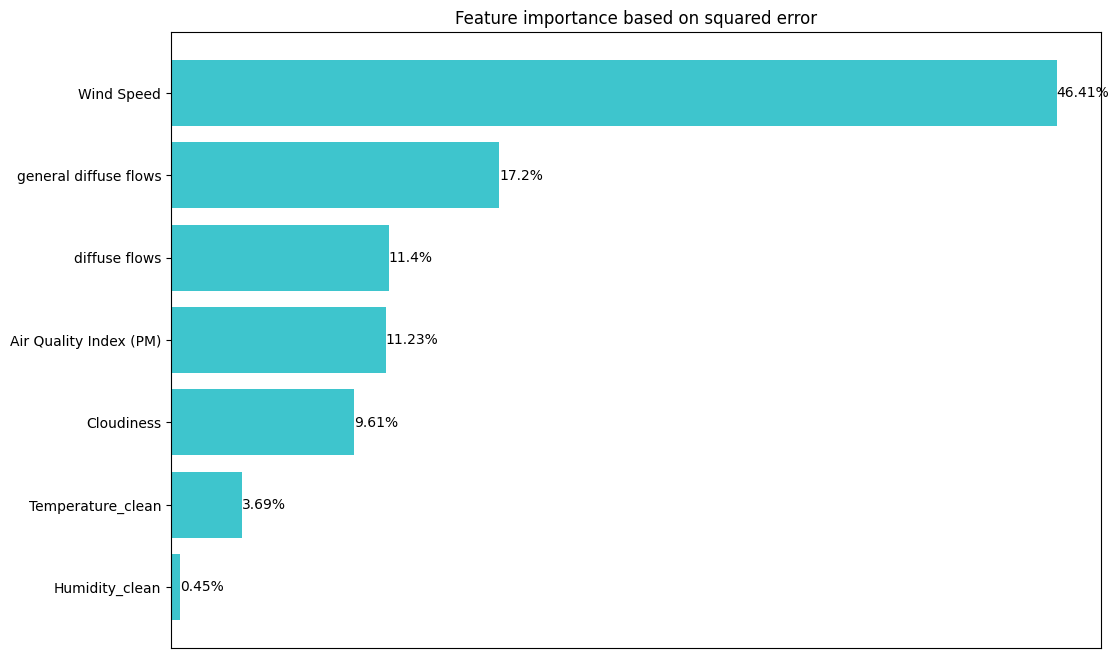

In [86]:
#feature importance graph
fig,ax = plt.subplots(figsize = (12,8))
plt.title('Feature importance based on squared error')
plt.barh('column_name','percentage_impurity',data = impurity_df,align='center',color = '#3EC5CD')
for i, val in enumerate(impurity_df['percentage_impurity']):
    plt.text(val,i,f'{round(val,2)}%',va = 'center',fontsize = 10)
plt.xticks([])
plt.gca().invert_yaxis()
plt.show()

In [89]:
# Training and testing the Random Forest regressor with best parameters
final_params = final_rf_model.get_params()
opt_model = RandomForestRegressor(**final_params)
opt_model.set_params(verbose = 1)

opt_model.fit(x_train,y_train)

print('\nTraining Score:',opt_model.score(x_train,y_train))

opt_y_pred = opt_model.predict(x_test)

print('\nTesting Accuracy: ',round(r2_score(y_test,opt_y_pred)*100,2),'%')

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   15.9s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   29.0s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s



Training Score: 0.947761738037882

Testing Accuracy:  63.27 %


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished
